In [1]:
import random
import matplotlib.pyplot as plt

# Experiments
import sys
sys.path.append('../..')

from model.amm.basilisk_amm import ConstantProductPoolState
from model.amm.agents import Agent
from model.amm.global_state import GlobalState
from model.amm.trade_strategies import random_swaps, invest_all

from model import run, plot_utils, processing

# same seed, same parameters = same simulation result
random.seed(42)

initial_state = GlobalState(
    pools = {
        'R1/R2': ConstantProductPoolState(
            tokens={
                'R1': 1000000,
                'R2': 1000000
            },
            trade_fee=0.001,
            fee_function = ConstantProductPoolState.custom_slip_fee(0.1)
        ),
        'R2/R3': ConstantProductPoolState(
            tokens={
                'R3': 1000000,
                'R2': 1000000
            },
            trade_fee=0.001,
            fee_function = ConstantProductPoolState.custom_slip_fee(0.2)
        ),
        'R1/R3': ConstantProductPoolState(
            tokens={
                'R1': 1000000,
                'R3': 1000000
            },
            trade_fee=0.001,
            fee_function = ConstantProductPoolState.thorchain_fee
        ),
    },

    agents = {
        'Trader1 (low volume)': Agent(
            holdings={'R1': 10000, 'R2': 10000},
            trade_strategy=random_swaps(pool_id='R1/R2', amount={'R1': 1000, 'R2': 1000}, randomize_amount=True)
        ),
        'Trader2 (mid volume)': Agent(
            holdings={'R2': 500000, 'R3': 500000},
            trade_strategy=random_swaps(pool_id='R2/R3', amount={'R3': 50000, 'R2': 50000}, randomize_amount=True)
        ),
        'Trader3 (high volume)': Agent(
            holdings={'R1': 1000000, 'R3': 1000000},
            trade_strategy=random_swaps(pool_id='R1/R3', amount={'R1': 10000, 'R3': 10000}, randomize_amount=True)
        )
    },
    
    external_market = {
        'R1': 1,
        'R2': 1,
        'R3': 1,
    }
)

events = run.run(initial_state, time_steps=5000)

Starting simulation...
Execution time: 12.995 seconds.


<AxesSubplot:title={'center':'pool: R1/R3 liquidity R3 '}>

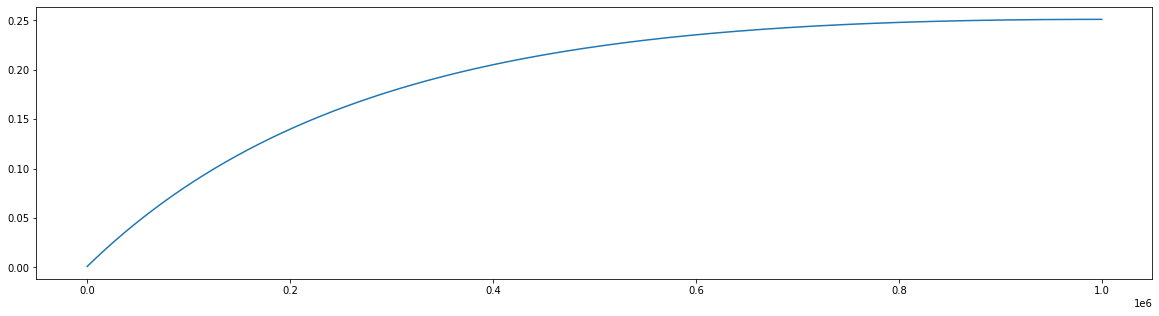

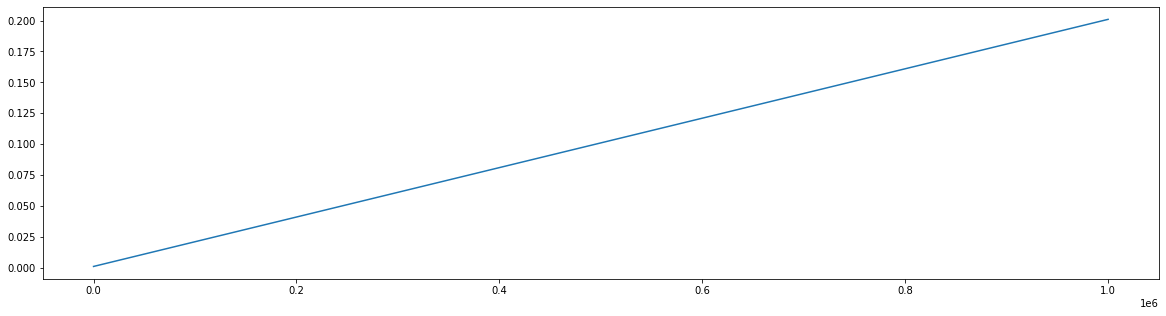

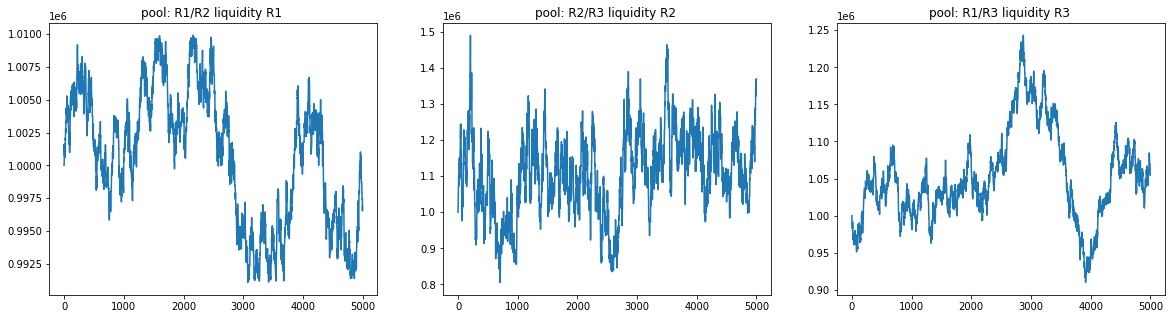

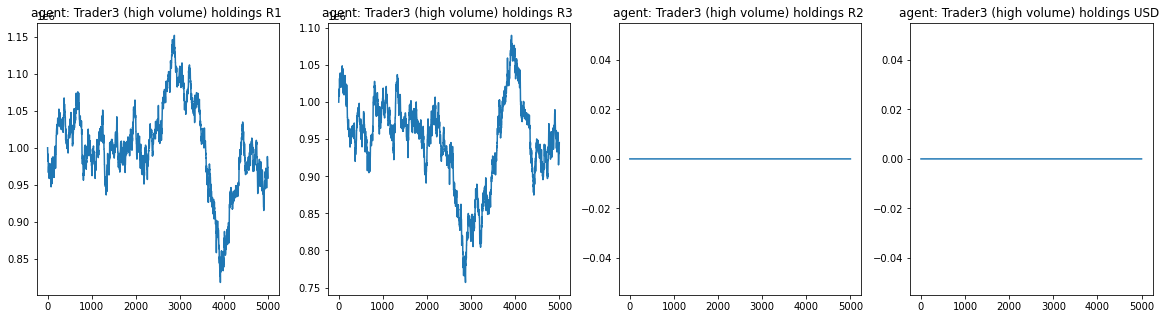

In [2]:
pool3 = initial_state.pools['R1/R3']
trade_range = range(0, int(pool3.liquidity['R3']), 10)
thorchain_fees = [
    pool3.trade_fee(tkn_buy='R3', tkn_sell='R1', trade_size=i)
    for i in trade_range
]
plt.figure(figsize=(20, 5))
plt.plot(trade_range, thorchain_fees)

pool2 = initial_state.pools['R2/R3']
custom_fees = [
    pool2.trade_fee(tkn_buy='R3', tkn_sell='R2', trade_size=i)
    for i in trade_range
]
plt.figure(figsize=(20, 5))
plt.plot(trade_range, custom_fees)

plot_utils.plot(events, pool='all', prop='liquidity')


<AxesSubplot:title={'center':'agent: Trader3 (high volume) holdings USD '}>

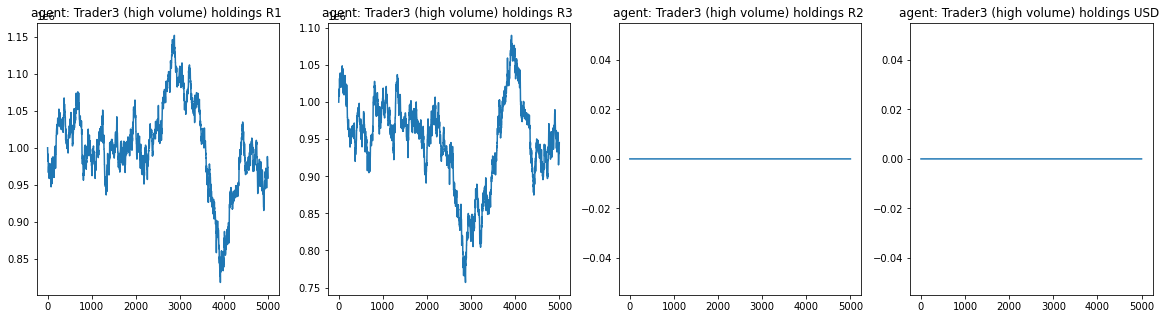

In [3]:

plot_utils.plot(events, agent='Trader3 (high volume)', prop='holdings')
